<a href="https://colab.research.google.com/github/gabisponciano/MNIST_Classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image, ImageOps

# Dowloading MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Data Analysis

In [3]:
print(x_train.shape)
print(y_train.shape)
df = pd.DataFrame(y_train)
df.value_counts()

(60000, 28, 28)
(60000,)


,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


<Axes: ylabel='Count'>

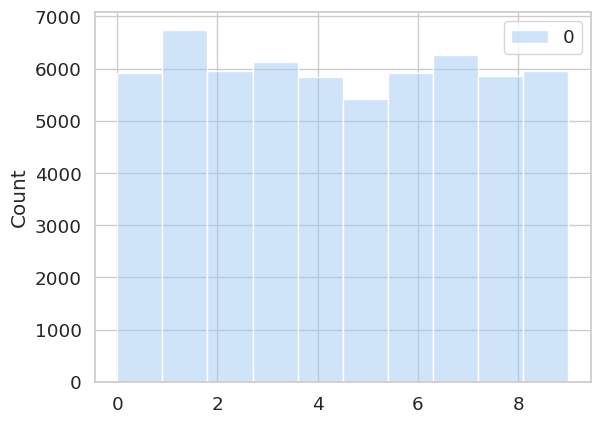

In [4]:
df = pd.DataFrame(y_train)
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
sns.histplot(data=df, bins=10)

# Normalizing data

In [5]:
x_test = x_test / 255.0
x_train = x_train / 255.0

# Model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8705 - loss: 0.4534 - val_accuracy: 0.9668 - val_loss: 0.1214
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9617 - loss: 0.1299 - val_accuracy: 0.9745 - val_loss: 0.0885
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0828 - val_accuracy: 0.9765 - val_loss: 0.0835
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9832 - loss: 0.0562 - val_accuracy: 0.9768 - val_loss: 0.0796
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9778 - val_loss: 0.0825


# Metrics

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0982


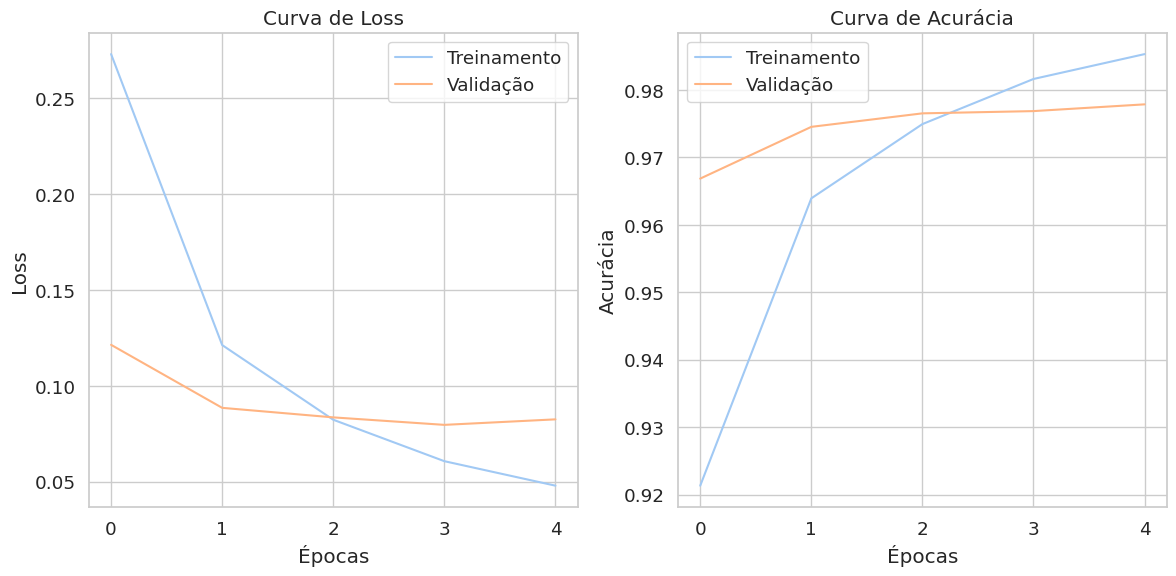

In [10]:
plt.figure(figsize=(12, 6))

# Curva de loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


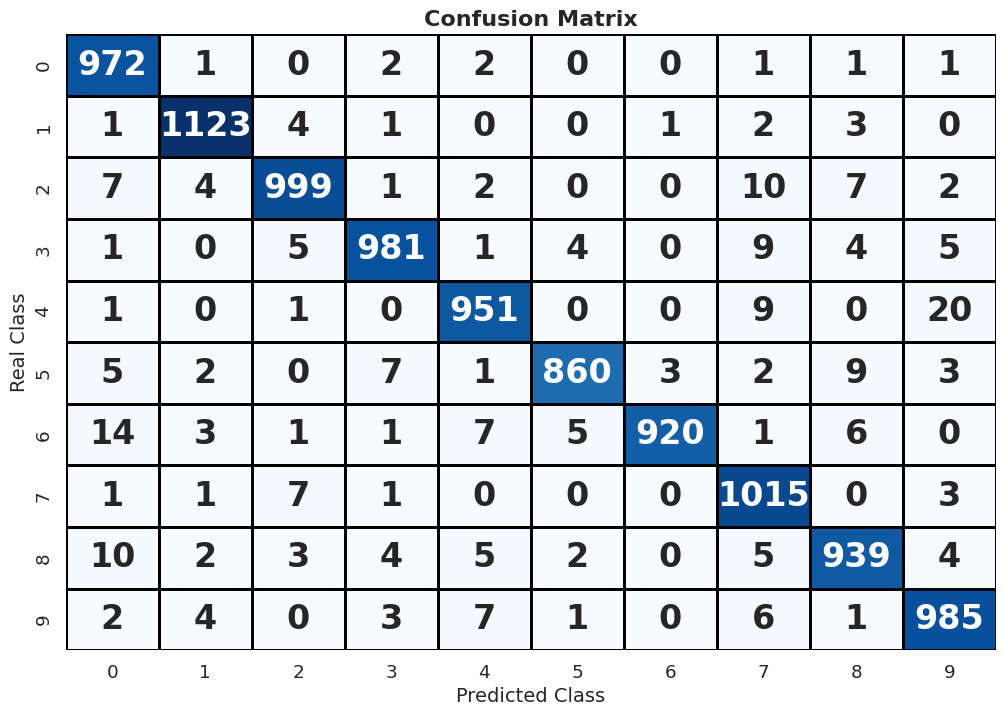

In [11]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10),
            annot_kws={"size": 24, 'weight': 'bold'}, linewidths=1, linecolor='black')

plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Real Class', fontsize=14)

plt.show()

# Inference

inference on the MNIST dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
predicted class: [7]


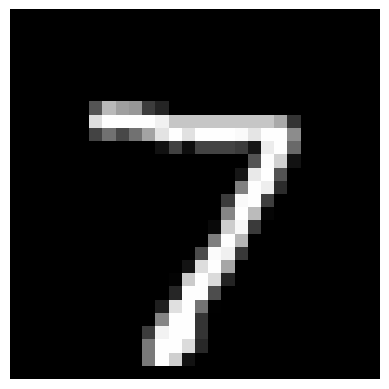

In [12]:
pred = model.predict(x_test[:1])
predicted_class = np.argmax(pred, axis=1)
print(f'predicted class: {predicted_class}')

plt.imshow(x_test[0], cmap='gray')
plt.axis('off')
plt.show()

Inference on random digit

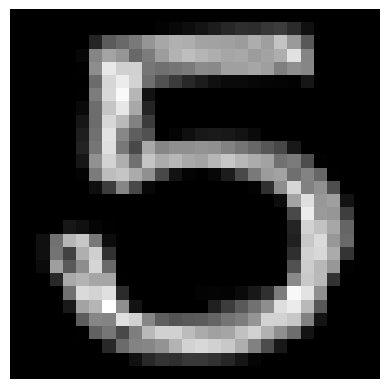

In [13]:
image = Image.open('/content/digit.jpg').convert('L')  # 'L' = grayscale

image = ImageOps.invert(image)    # Convert image colors, the background to black and the digit to white

image_resized = image.resize((28, 28))

image_array = np.array(image_resized) / 255.0  # shape: (28, 28)

image_input = image_array.reshape(1, 28, 28)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
pred = model.predict(image_input)
img_class = np.argmax(pred, axis=1)
print(f'predicted class: {img_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted class: [5]
